In [326]:
import uproot

import pandas as pd
import ultraplot as plot

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

plot.rc['figure.facecolor'] = 'none'
plot.rc['savefig.facecolor'] = 'none'
plot.rc['legend.frameon'] = False

plot.rc['cmap.levels'] = 4

file = uproot.open('reco1muNp_checks.root')
cheated_POT = file['cheated/POT'].values()
non_cheated_POT = file['non_cheated/POT'].values()

cheated_nopid_POT = file['cheated/POT'].values()
non_cheated_nopid_POT = file['non_cheated/POT'].values()

# Cheating control plots 

Plot di controllo basilari del cheating. Eventi 1µNp true selected con requirement di selezione definiti dalla sola lunghezza delle tracce ricostruite (PID independent selection)

Abbiamo

 - vertice, differenza in 3D e proiettata lugo i tre assi
 - hit purity e hit completeness per protone leading + all e muone, ~da fare ancora per gli N-1 protoni non leading (esiste il codice solo da fare girare)~
 - $L_\text{reco}/L_\text{true}$ per muone e protone leading + all (come sopra)
 - $p_\text{reco}/p_\text{true}$ per muone e protone leading + all (come sopra)


In [327]:
nopid_cheated = file['cheated_nopid/cheated_nopid_checks'].arrays(library='ak')
nopid_non_cheated = file['non_cheated_nopid/non_cheated_nopid_checks'].arrays(library='ak')

nopid_cheated_multip = file['cheated_nopid/cheated_nopid_checks_multip'].arrays(library='ak')
nopid_non_cheated_multip = file['non_cheated_nopid/non_cheated_nopid_checks_multip'].arrays(library='ak')

nopid_cheated.fields, nopid_non_cheated.fields, nopid_cheated_multip.fields, nopid_non_cheated_multip.fields

(['vertex_difference_3D',
  'vertex_difference_x',
  'vertex_difference_y',
  'vertex_difference_z',
  'muon_hit_purity',
  'leading_proton_hit_purity',
  'muon_hit_completeness',
  'leading_proton_hit_completeness',
  'muon_L_reco_true_ratio',
  'leading_proton_L_reco_true_ratio',
  'muon_P_reco_true_ratio',
  'leading_proton_P_reco_true_ratio',
  'neutrino_reco_E',
  'neutrino_true_E',
  'neutrino_reco_dE',
  'neutrino_reco_pT',
  'muon_R',
  'leading_proton_R'],
 ['vertex_difference_3D',
  'vertex_difference_x',
  'vertex_difference_y',
  'vertex_difference_z',
  'muon_hit_purity',
  'leading_proton_hit_purity',
  'muon_hit_completeness',
  'leading_proton_hit_completeness',
  'muon_L_reco_true_ratio',
  'leading_proton_L_reco_true_ratio',
  'muon_P_reco_true_ratio',
  'leading_proton_P_reco_true_ratio',
  'neutrino_reco_E',
  'neutrino_true_E',
  'neutrino_reco_dE',
  'neutrino_reco_pT',
  'muon_R',
  'leading_proton_R'],
 ['protons_hit_purity',
  'protons_hit_completeness',
  'pro

## Vertex

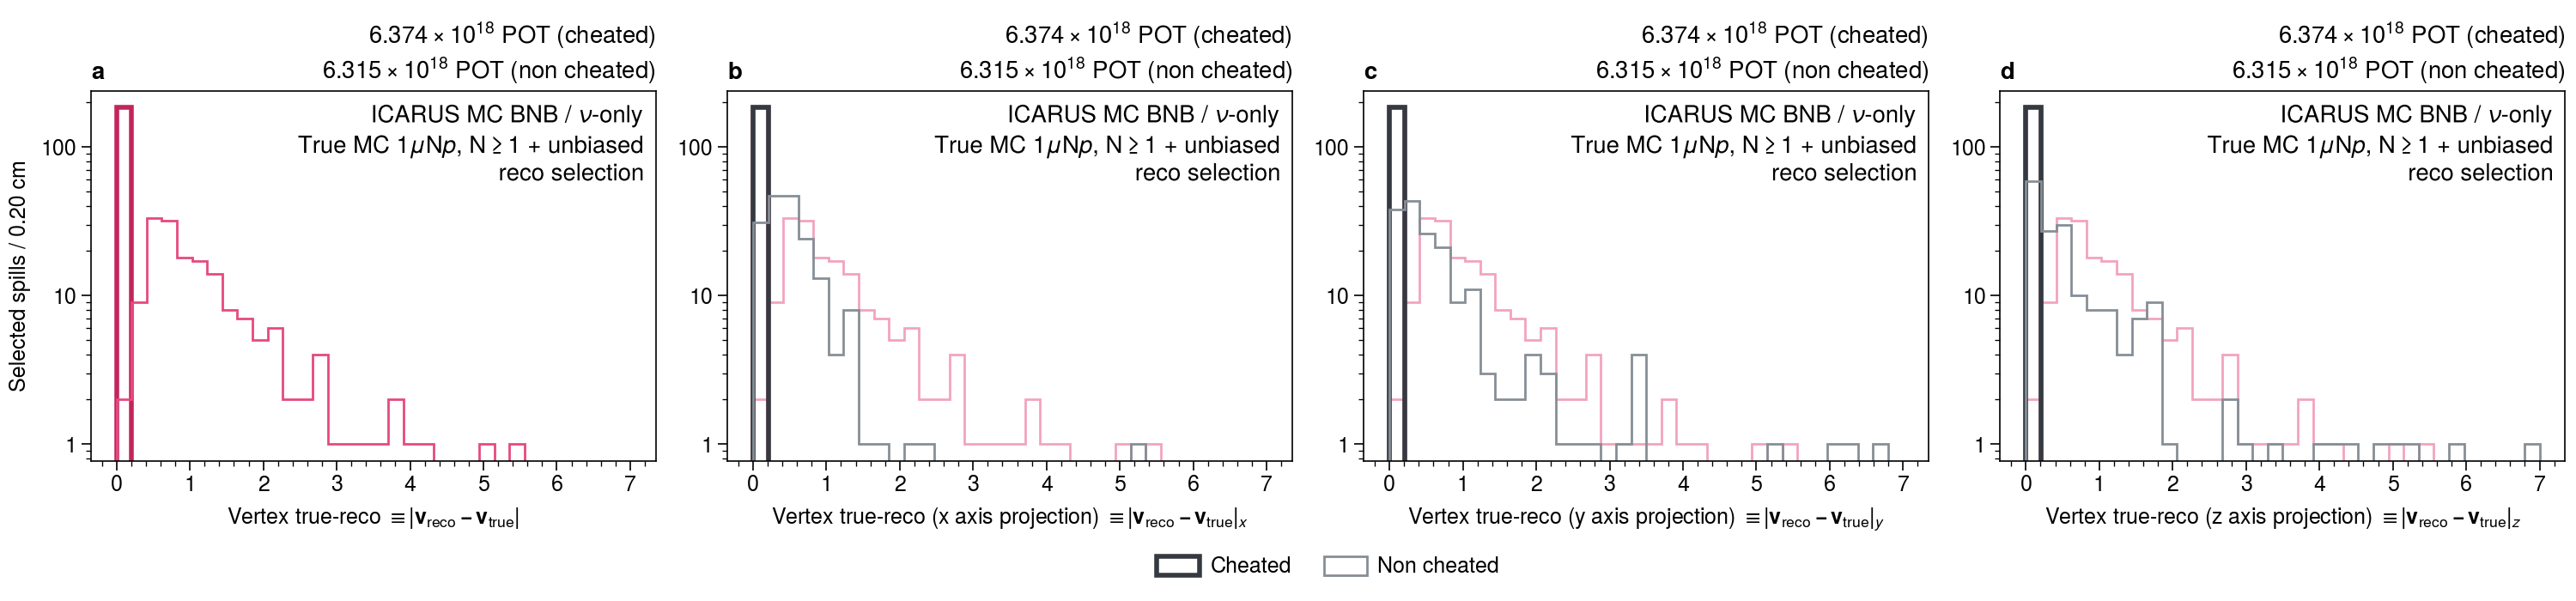

In [328]:
bins = np.linspace(0, 7, 35)

cheating_dict = {
    'color': 'gray8',
    'lw': 2,
    'ls': '-',
    'fill': False,
    'alpha': 1,
}


un_cheating_dict = {
    'color': 'gray6',
    'lw': 1,
    'ls': '-',
    'fill': False,
    'alpha': 1
}

cheating_dict_nocolor = {
    # 'color': 'gray8',
    'lw': 2,
    'ls': '-',
    'fill': False,
    # 'alpha': 0.5,
}


un_cheating_dict_nocolor = {
    # 'color': 'gray6',
    'lw': 1,
    'ls': '-',
    'fill': False,
    # 'alpha': 0.5
}


fig, ax = plot.subplots(
    width=15, height=3.5, ncols=4, nrows=1, 
    xlabel=r'Vertex true-reco $\equiv |{\bf v_\text{reco} - v_\text{true}}|$', ylabel=f'Selected spills / {(bins.max()-bins.min())/len(bins):.2f} cm',  
    titlecolor='k', abc=True, share=False, grid=False, sharey='labs',
    rtitle=f'${cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (cheated)\n${non_cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (non cheated)',
    # titlesize=9,
    urtitle='ICARUS MC BNB / $\\nu$-only\nTrue MC $1\\mu \\text{N}p$, N$\\geq1$ + unbiased\nreco selection', yscale='log',
    # suptitle='Vertex differences'
)

ax[0].hist(nopid_cheated.vertex_difference_3D.to_numpy(), bins=bins, **cheating_dict_nocolor, color='pink8')
ax[0].hist(nopid_non_cheated.vertex_difference_3D.to_numpy(), bins=bins, **un_cheating_dict_nocolor, color='pink6')

for idx, axis in enumerate(['x', 'y', 'z']): 
    ax[idx+1].hist(nopid_cheated.vertex_difference_3D.to_numpy(), bins=bins, **cheating_dict_nocolor, color='pink8', alpha=0.5)
    ax[idx+1].hist(nopid_non_cheated.vertex_difference_3D.to_numpy(), bins=bins, **un_cheating_dict_nocolor, color='pink6', alpha=0.5)
    if idx == 1:
        ax[idx+1].hist(nopid_cheated[f'vertex_difference_{axis}'].to_numpy(), bins=bins, **cheating_dict, label='Cheated')
        ax[idx+1].hist(nopid_non_cheated[f'vertex_difference_{axis}'].to_numpy(), bins=bins, **un_cheating_dict, label='Non cheated')
    else:
        ax[idx+1].hist(nopid_cheated[f'vertex_difference_{axis}'].to_numpy(), bins=bins, **cheating_dict)
        ax[idx+1].hist(nopid_non_cheated[f'vertex_difference_{axis}'].to_numpy(), bins=bins, **un_cheating_dict)
    ax[idx+1].format(xlabel=f'Vertex true-reco ({axis} axis projection) $\\equiv |{{\\bf v_\\text{{reco}} - v_\\text{{true}}}}|_{axis}$')

fig.legend(loc='b')
fig.savefig('nopid_vertex.pdf')

## Hit purity e completeness

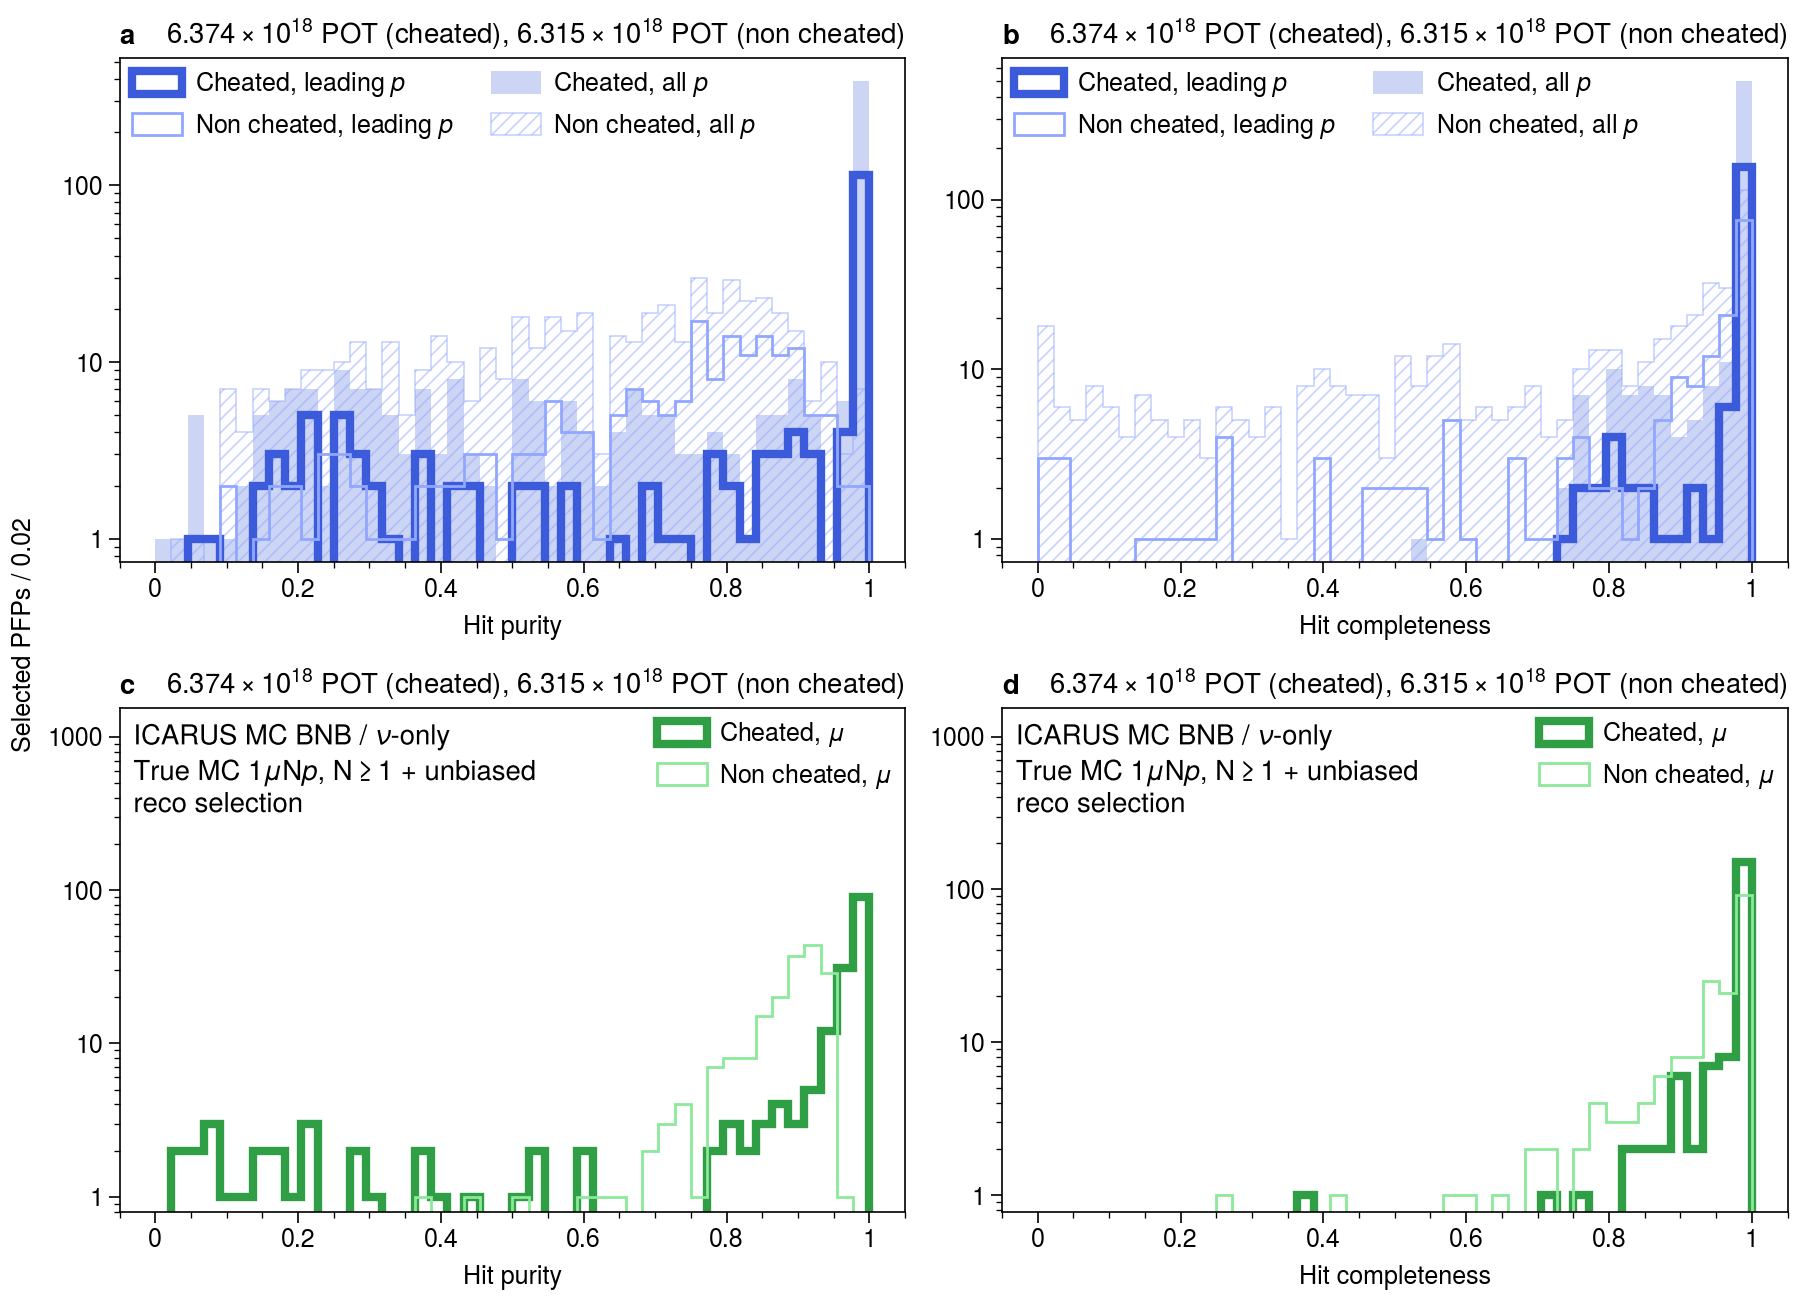

In [329]:

bins=np.linspace(0, 1, 45)

fig, ax = plot.subplots(
    width=9, height=6.5, ncols=2, nrows=2, 
    xlabel=r'Hits', ylabel=f'Selected PFPs / {(bins.max()-bins.min())/len(bins):.2f}',  
    titlecolor='k', abc=True, share=False, grid=False, sharey='labs',
    rtitle=f'${cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (cheated), ${non_cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (non cheated)',
    # titlesize=9,
    ultitle='ICARUS MC BNB / $\\nu$-only\nTrue MC $1\\mu \\text{N}p$, N$\\geq1$ + unbiased\nreco selection', yscale='log',
)

cheating_dict = {
    'lw': 3,
    'fill': False,
}

un_cheating_dict = {
    'lw': 1,
    'fill': False,
}

cheating_color = {
    'leading_proton': 'indigo8',
    'muon': 'green8'
}

un_cheating_color = {
    'leading_proton': 'indigo3',
    'muon': 'green3'
}

particle_name = {
    'leading_proton': 'leading $p$',
    'muon': '$\\mu$'
}

for idx_p, particle in enumerate(['leading_proton', 'muon']):
    for idx_l, label in enumerate(['purity', 'completeness']):
        ax[idx_p, idx_l].hist(nopid_cheated[f'{particle}_hit_{label}'].to_numpy(), bins=bins, **cheating_dict, 
                              color=cheating_color[particle], label=f'Cheated, {particle_name[particle]}')
        ax[idx_p, idx_l].hist(nopid_non_cheated[f'{particle}_hit_{label}'].to_numpy(), bins=bins, **un_cheating_dict, 
                              color=un_cheating_color[particle], label=f'Non cheated, {particle_name[particle]}')
        ax[idx_p, idx_l].format(xlabel=f'Hit {label}')

for idx_l, label in enumerate(['purity', 'completeness']):
    ax[idx_l].hist(nopid_cheated_multip[f'protons_hit_{label}'].to_numpy(), bins=bins, 
                   color=cheating_color['leading_proton'], alpha=0.25, label=f'Cheated, all $p$', zorder=1)
    ax[idx_l].hist(nopid_non_cheated_multip[f'protons_hit_{label}'].to_numpy(), bins=bins, 
                   color=un_cheating_color['leading_proton'], fill=False, hatch='/////', alpha=0.5, label=f'Non cheated, all $p$', zorder=1)
    ax[idx_l].format(ultitle='')
    ax[idx_l].legend(loc='ul', ncols=2, order='F')

ax[2].legend(loc='ur', ncols=1)
ax[3].legend(loc='ur', ncols=1)

ax[2].format(ymax=1550)
ax[3].format(ymax=1550)

fig.savefig('nopid_hit_purity_completeness.pdf')

### Check sulla qualità della ricostruzione

I picchi a zero (presenti anche poi in tutti gli altri plot) sono probabilmente legati a eventi che non sono ricostruiti in modo sensato
Posso verificare questa cosa considerando la energia depositata true


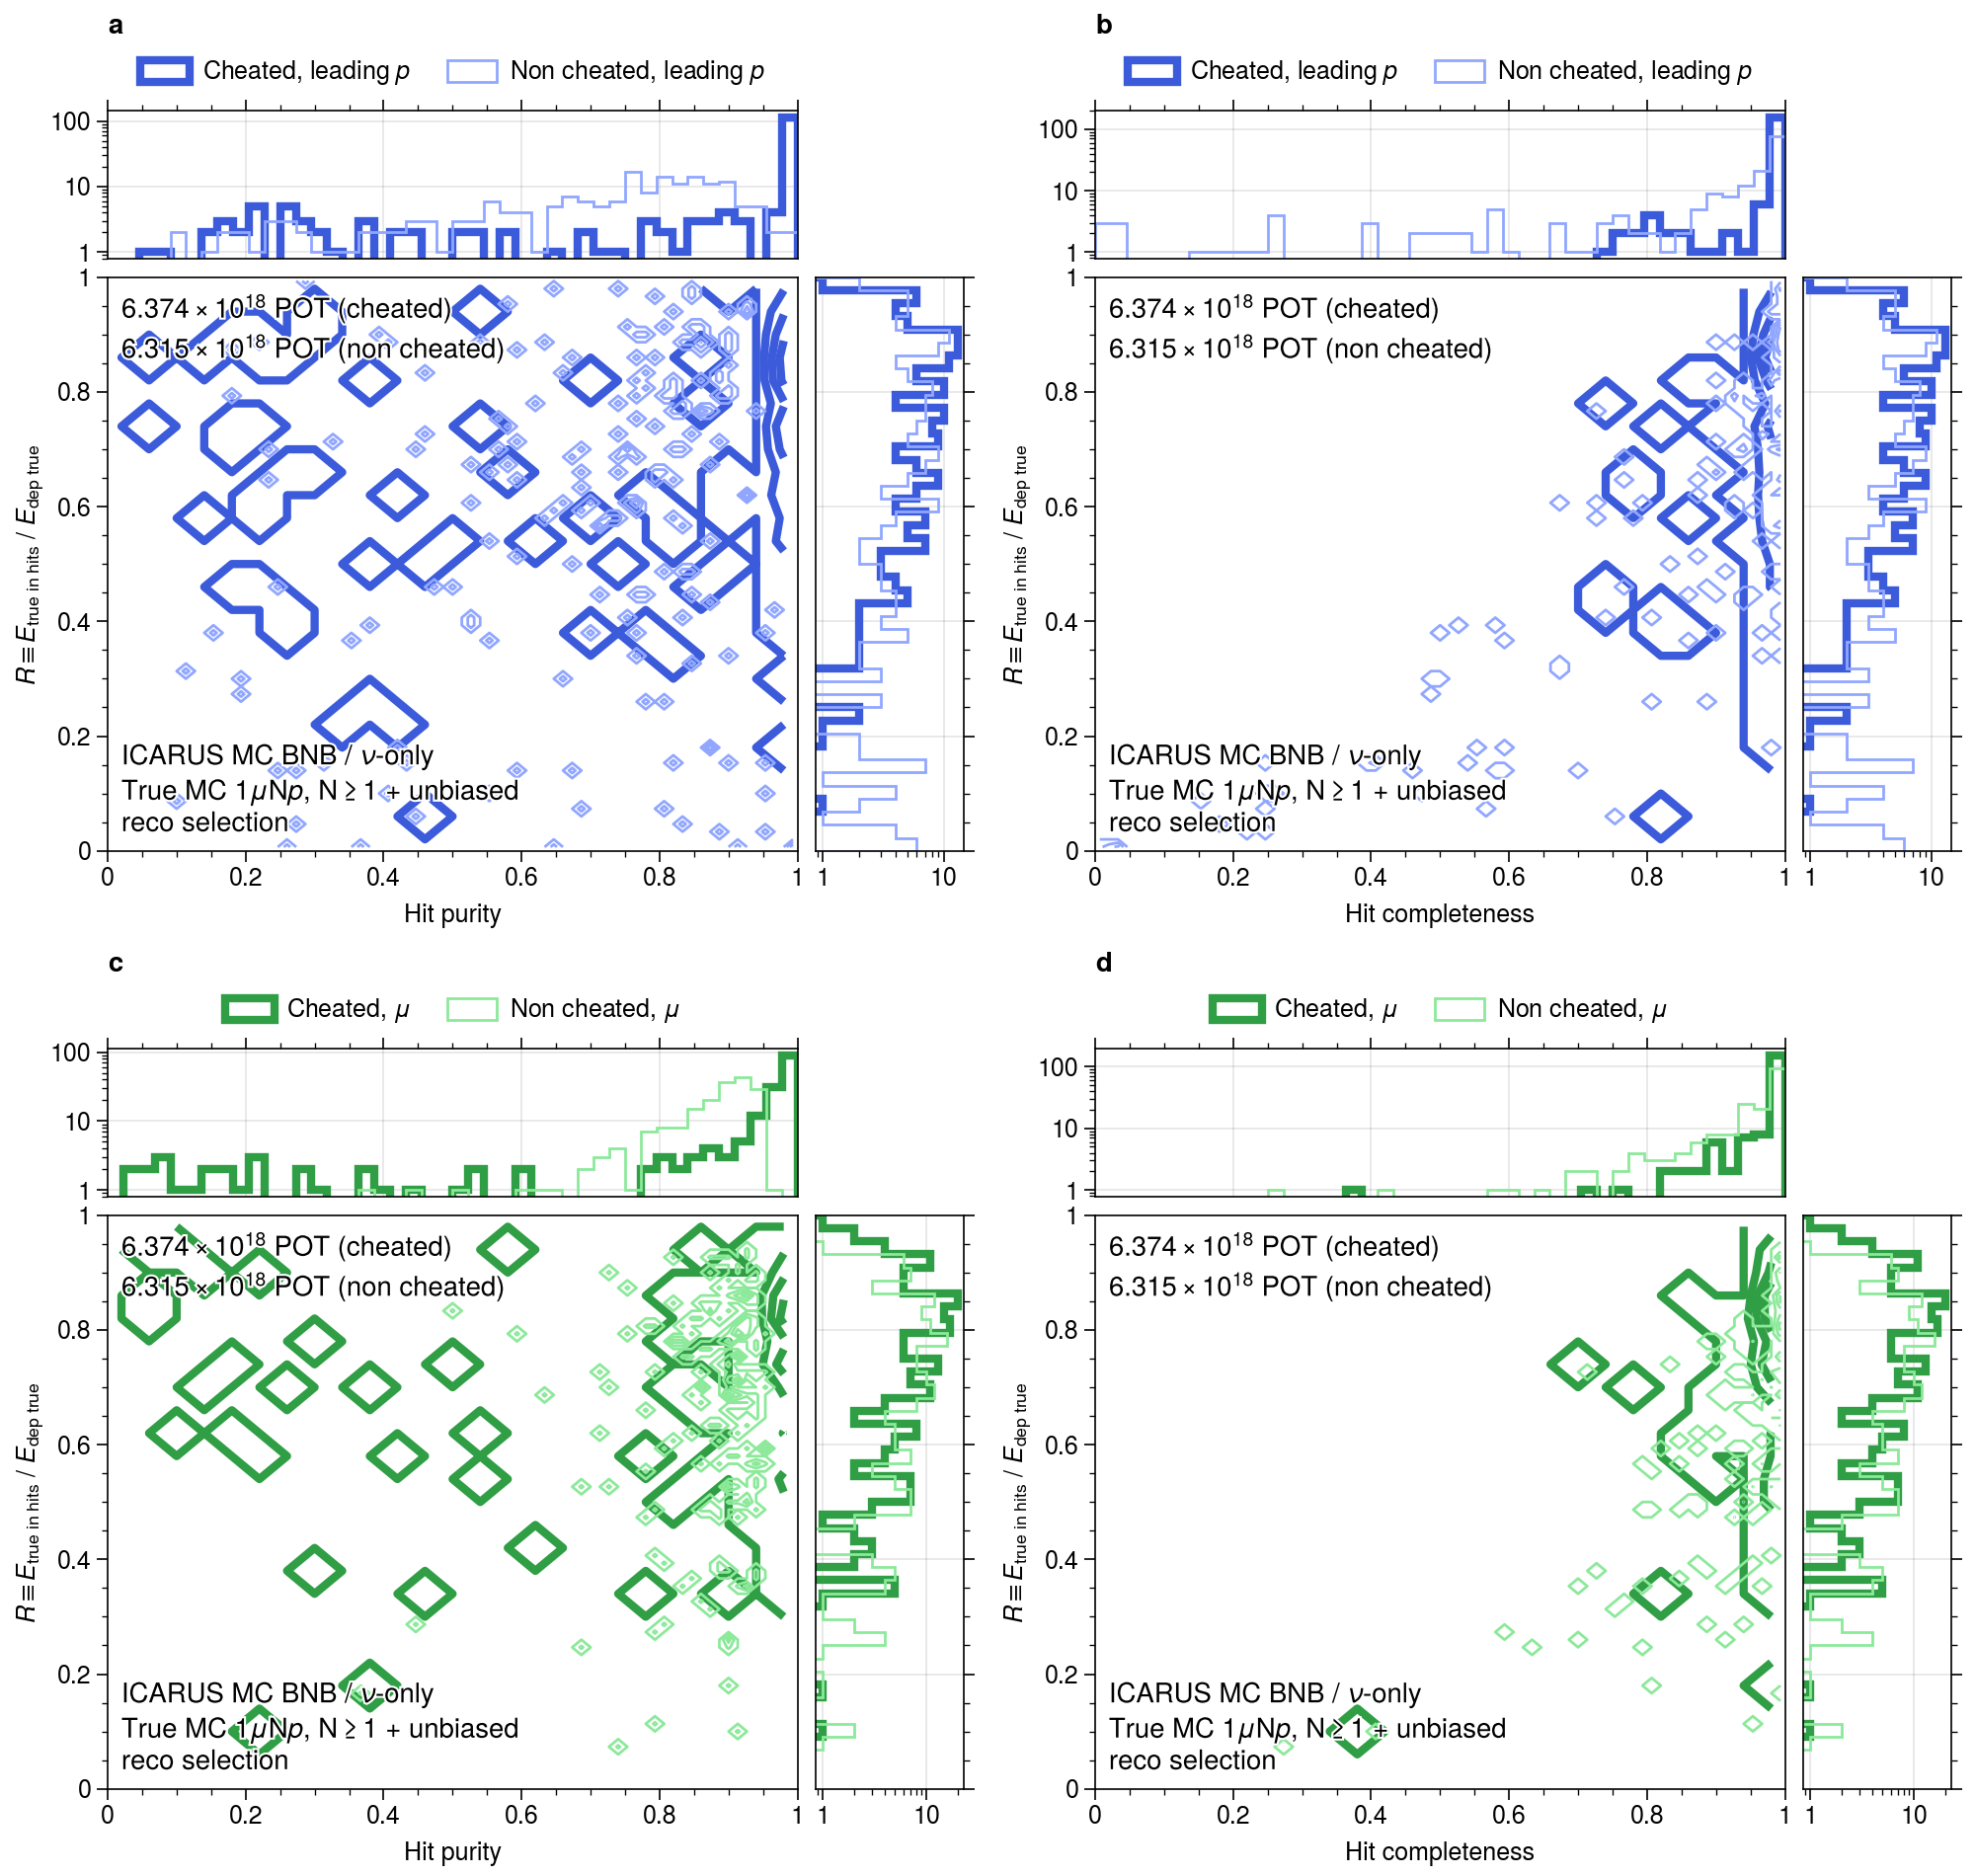

In [330]:
fig, ax = plot.subplots(
    width=10, height=9.5, ncols=2, nrows=2, 
    xlabel=r'Hits', ylabel=f'Selected PFPs / {(bins.max()-bins.min())/len(bins):.2f}',  
    titlecolor='k', abc=True, share=False, grid=False, sharey=False, #'labs',
    ultitle=f'${cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (cheated)\n${non_cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (non cheated)',
    # titlesize=9,
    lltitle='ICARUS MC BNB / $\\nu$-only\nTrue MC $1\\mu \\text{N}p$, N$\\geq1$ + unbiased\nreco selection',
)

for idx_p, particle in enumerate(['leading_proton', 'muon']):
    for idx_l, label in enumerate(['purity', 'completeness']):
        H, xe, ye = np.histogram2d(
            x=nopid_cheated[f'{particle}_hit_{label}'].to_numpy(), 
            y=nopid_cheated[f'{particle}_R'].to_numpy(), bins=[25, 25], range=[[0, 1], [0, 1]], density=True)
        ax[idx_p, idx_l].contour(xe, ye, H.T, color=cheating_color[particle], lw=3, label=f'Cheated, {particle_name[particle]}')
        
        H, xe, ye = np.histogram2d(
            x=nopid_non_cheated[f'{particle}_hit_{label}'].to_numpy(), 
            y=nopid_non_cheated[f'{particle}_R'].to_numpy(), bins=[75, 75], range=[[0, 1], [0, 1]], density=True)
        ax[idx_p, idx_l].contour(xe, ye, H.T, color=un_cheating_color[particle], lw=1, label=f'Non cheated, {particle_name[particle]}')
        
        top = ax[idx_p, idx_l].panel(side='t', width='6em', space='0.75em')
        top.format(xlim=(0, 1), yscale='log')
        top.hist(nopid_cheated[f'{particle}_hit_{label}'].to_numpy(), bins=bins, **cheating_dict, 
                              color=cheating_color[particle], label=f'Cheated, {particle_name[particle]}')
        top.hist(nopid_non_cheated[f'{particle}_hit_{label}'].to_numpy(), bins=bins, **un_cheating_dict, 
                              color=un_cheating_color[particle], label=f'Non cheated, {particle_name[particle]}')

        right = ax[idx_p, idx_l].panel(side='r', width='6em', space='0.75em')
        right.format(ylim=(0, 1), xscale='log')
        right.hist(nopid_cheated[f'{particle}_R'].to_numpy(), bins=bins, **cheating_dict, 
                              color=cheating_color[particle], orientation='horizontal')
        right.hist(nopid_non_cheated[f'{particle}_R'].to_numpy(), bins=bins, **un_cheating_dict, 
                              color=un_cheating_color[particle], orientation='horizontal')

        ax[idx_p, idx_l].format(xlabel=f'Hit {label}', ylabel=r'$R \equiv E_\text{true in hits}\ /\ E_\text{dep true}$')
        ax[idx_p, idx_l].legend(loc='t')

fig.savefig('nopid_R_versus_hits.pdf')

## Lenght reco/true fraction check

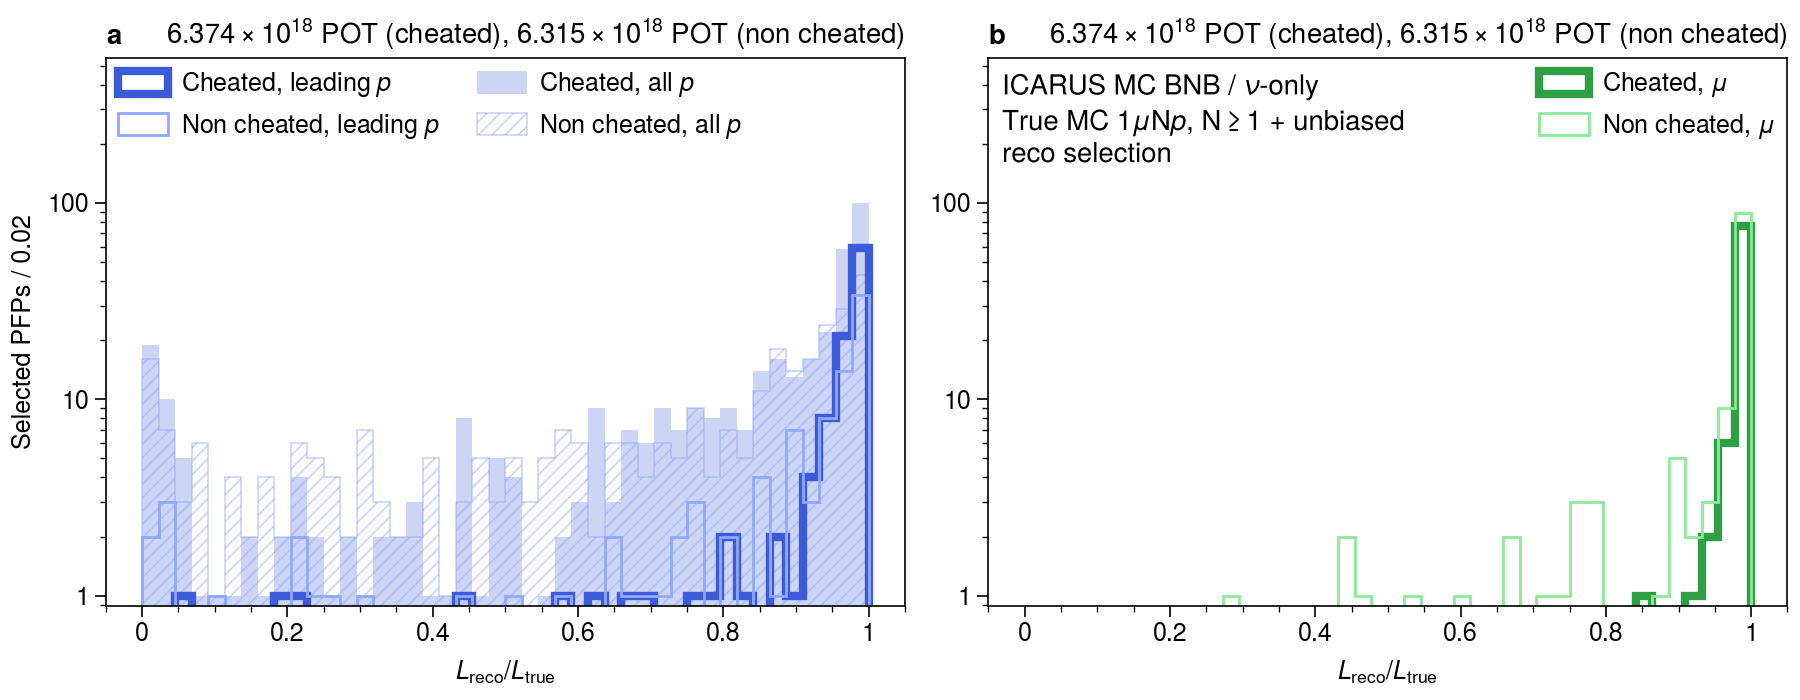

In [331]:
bins=np.linspace(0, 1, 45)

fig, ax = plot.subplots(
    width=9, height=3.5, ncols=2, nrows=1, 
    xlabel=r'$L_\text{reco}/L_\text{true}$', ylabel=f'Selected PFPs / {(bins.max()-bins.min())/len(bins):.2f}',  
    titlecolor='k', abc=True, share=False, grid=False, sharey='labs',
    rtitle=f'${cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (cheated), ${non_cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (non cheated)',
    # titlesize=9,
    ultitle='ICARUS MC BNB / $\\nu$-only\nTrue MC $1\\mu \\text{N}p$, N$\\geq1$ + unbiased\nreco selection', yscale='log', ymax=550
)

for idx_p, particle in enumerate(['leading_proton', 'muon']):
    ax[idx_p].hist(nopid_cheated[f'{particle}_L_reco_true_ratio'].to_numpy(), bins=bins, **cheating_dict, 
                   color=cheating_color[particle], label=f'Cheated, {particle_name[particle]}')
    ax[idx_p].hist(nopid_non_cheated[f'{particle}_L_reco_true_ratio'].to_numpy(), bins=bins, **un_cheating_dict, 
                   color=un_cheating_color[particle], label=f'Non cheated, {particle_name[particle]}')

ax[0].hist(nopid_cheated_multip[f'protons_L_reco_true_ratio'].to_numpy(), bins=bins, 
           color=cheating_color['leading_proton'], alpha=0.25, label=f'Cheated, all $p$', zorder=1)
ax[0].hist(nopid_non_cheated_multip[f'protons_L_reco_true_ratio'].to_numpy(), bins=bins, 
           color=un_cheating_color['leading_proton'], fill=False, hatch='/////', alpha=0.5, label=f'Non cheated, all $p$', zorder=1)
ax[0].format(ultitle='')
ax[0].legend(loc='ul', ncols=2, order='F')
ax[1].legend(loc='ur', ncols=1)

fig.savefig('nopid_L_reco_true_ratio.pdf')

## Momentum reco/true check

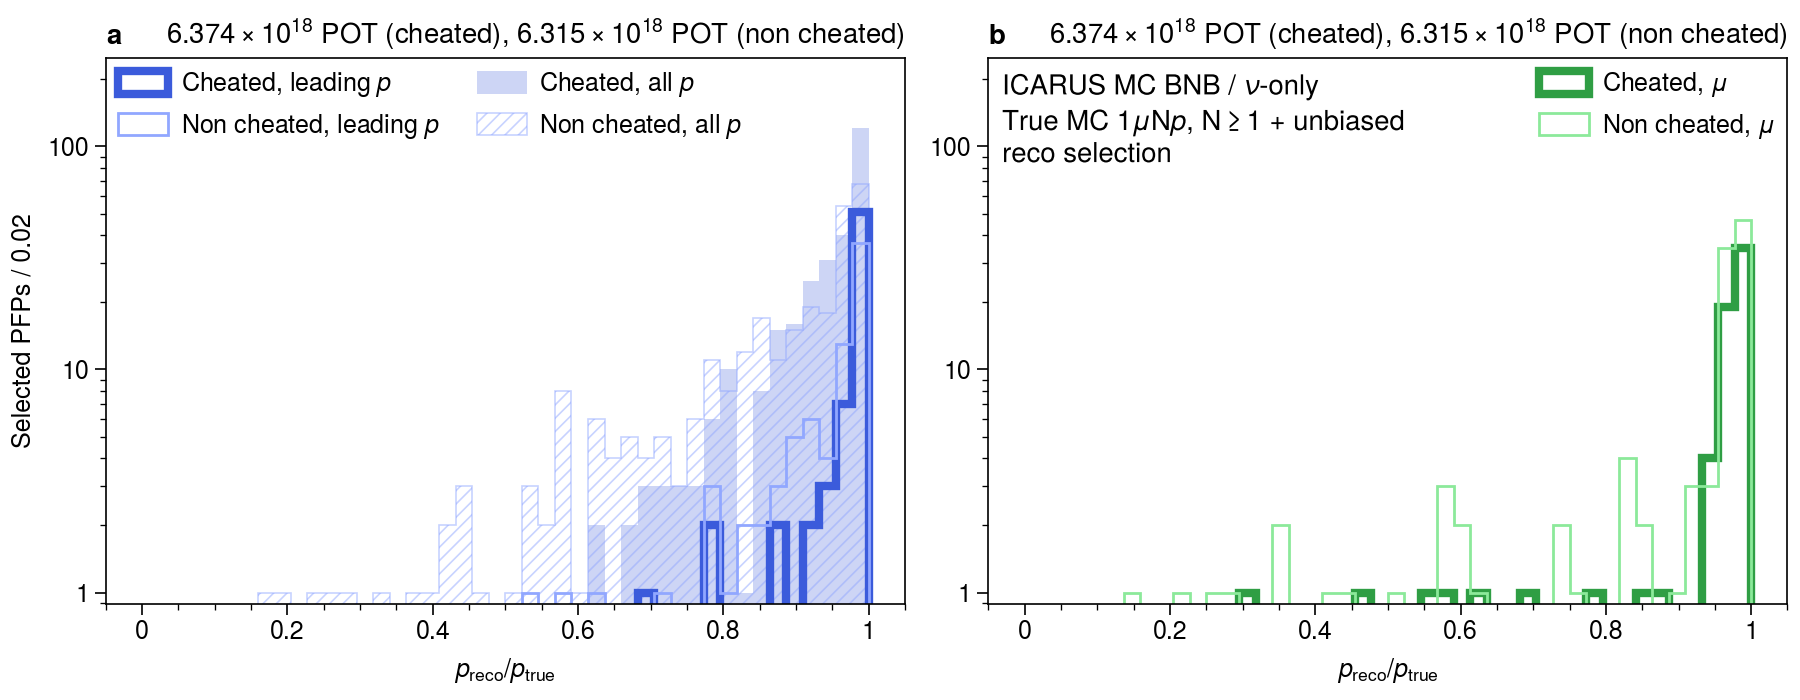

In [332]:
bins=np.linspace(0, 1, 45)

fig, ax = plot.subplots(
    width=9, height=3.5, ncols=2, nrows=1, 
    xlabel=r'$p_\text{reco}/p_\text{true}$', ylabel=f'Selected PFPs / {(bins.max()-bins.min())/len(bins):.2f}',  
    titlecolor='k', abc=True, share=False, grid=False, sharey='labs',
    rtitle=f'${cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (cheated), ${non_cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (non cheated)',
    # titlesize=9,
    ultitle='ICARUS MC BNB / $\\nu$-only\nTrue MC $1\\mu \\text{N}p$, N$\\geq1$ + unbiased\nreco selection', yscale='log', ymax=250
)

for idx_p, particle in enumerate(['leading_proton', 'muon']):
    ax[idx_p].hist(nopid_cheated[f'{particle}_P_reco_true_ratio'].to_numpy(), bins=bins, **cheating_dict, 
                   color=cheating_color[particle], label=f'Cheated, {particle_name[particle]}')
    ax[idx_p].hist(nopid_non_cheated[f'{particle}_P_reco_true_ratio'].to_numpy(), bins=bins, **un_cheating_dict, 
                   color=un_cheating_color[particle], label=f'Non cheated, {particle_name[particle]}')

ax[0].hist(nopid_cheated_multip[f'protons_P_reco_true_ratio'].to_numpy(), bins=bins, 
           color=cheating_color['leading_proton'], alpha=0.25, label=f'Cheated, all $p$', zorder=1)
ax[0].hist(nopid_non_cheated_multip[f'protons_P_reco_true_ratio'].to_numpy(), bins=bins, 
           color=un_cheating_color['leading_proton'], fill=False, hatch='/////', alpha=0.5, label=f'Non cheated, all $p$', zorder=1)
ax[0].format(ultitle='')
ax[0].legend(loc='ul', ncols=2, order='F')
ax[1].legend(loc='ur', ncols=1)

fig.savefig('nopid_P_reco_true_ratio.pdf')

## Energia ricostruita

Plot dell'enrgia ricostruita e della sua differenza rispetto al true $\delta_E = E_\text{reco}-E_\text{true}/E_\text{}$

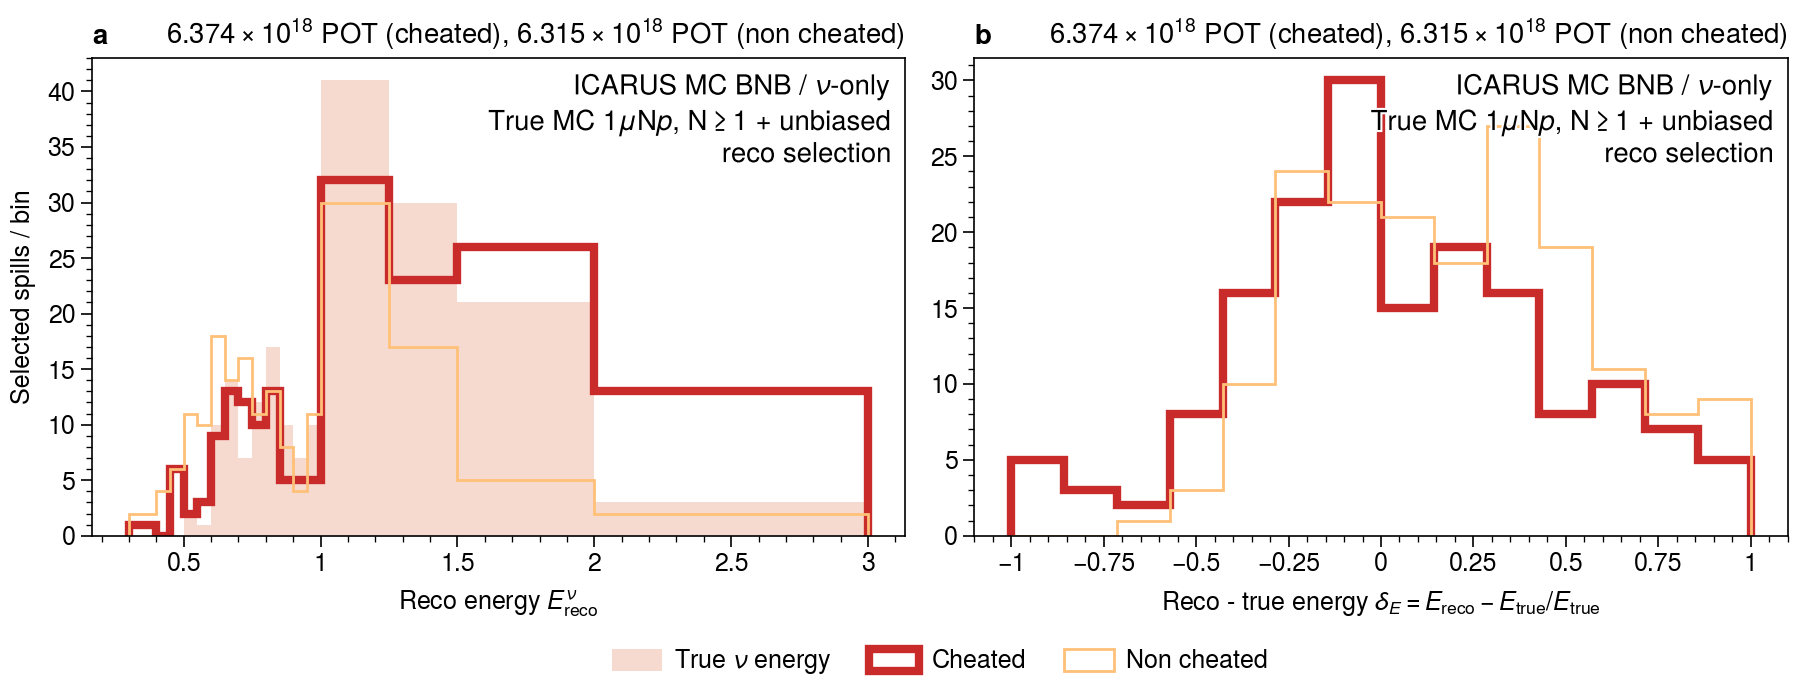

In [333]:
bins=np.array([0.3, 0.4, 0.45, 0.5,0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.25, 1.5, 2.0, 3.0])

# # Define binning parameters
# linthresh = 0.1  # Linear threshold where transition occurs
# num_linear_bins = 5  # Number of bins in the linear region
# num_log_bins = 5  # Number of bins per logarithmic side

# # Logarithmic bins for positive and negative sides
# log_bins_pos = np.geomspace(linthresh, 1, num_log_bins)
# log_bins_neg = -log_bins_pos[::-1]  # Mirror for negative side

# # Linear bins in the middle
# lin_bins = np.linspace(-linthresh, linthresh, num_linear_bins)

# # Combine bins while avoiding duplicates
# dE_bins=np.concatenate([log_bins_neg, lin_bins[1:-1], log_bins_pos]) 
dE_bins=np.linspace(-1, 1, 15)

fig, ax = plot.subplots(
    width=9, height=3.5, ncols=2, nrows=1, 
    xlabel=r'Reco energy $E_\text{reco}^\nu$', ylabel=f'Selected spills / bin',  
    titlecolor='k', abc=True, share=False, grid=False, sharey='labs',
    rtitle=f'${cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (cheated), ${non_cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (non cheated)',
    # titlesize=9,
    urtitle='ICARUS MC BNB / $\\nu$-only\nTrue MC $1\\mu \\text{N}p$, N$\\geq1$ + unbiased\nreco selection'# , yscale='log',
)

cheating_dict = {
    'lw': 3,
    'fill': False,
}

un_cheating_dict = {
    'lw': 1,
    'fill': False,
}

cheating_dict['color'] = 'red9'
un_cheating_dict['color'] = 'orange3'

ax[0].hist(nopid_cheated.neutrino_reco_E.to_numpy(), bins=bins, **cheating_dict)
ax[0].hist(nopid_non_cheated.neutrino_reco_E.to_numpy(), bins=bins, **un_cheating_dict)

# ax[0].hist(nopid_cheated.neutrino_true_E.to_numpy(), bins=bins, color='red9', alpha=0.5, fill=False, hatch='////')
ax[0].hist(nopid_non_cheated.neutrino_true_E.to_numpy(), bins=bins, color='orange9', alpha=0.2, fill=True, label='True $\\nu$ energy')

ax[1].hist(nopid_cheated.neutrino_reco_dE.to_numpy(), bins=dE_bins, **cheating_dict, label='Cheated')
ax[1].hist(nopid_non_cheated.neutrino_reco_dE.to_numpy(), bins=dE_bins, **un_cheating_dict, label='Non cheated')
ax[1].format(xlabel=r'Reco - true energy $\delta_E = E_\text{reco}-E_\text{true}/E_\text{true}$')

fig.legend(loc='b')
fig.savefig('nopid_energy.pdf')

# Truth + reco 1µNp selection and PID-based checks

Gli stessi plot di sopra, considerando però una selection pid-based (M. Artero).

In [334]:
cheated_checks = file['cheated/cheated_checks'].arrays(library='ak')
non_cheated_checks = file['non_cheated/non_cheated_checks'].arrays(library='ak')

In [335]:
cheated_checks.fields

['vertex_difference',
 'vertex_difference_x',
 'vertex_difference_y',
 'vertex_difference_z',
 'muon_purity',
 'muon_completeness',
 'proton_purity',
 'proton_completeness',
 'muon_L_reco_true_ratio',
 'leading_proton_L_reco_true_ratio',
 'muon_P_reco_true_ratio',
 'leading_proton_P_reco_true_ratio']

## Vertex 

Double check, non mi aspetto nessuna differenza tra questo e il caso nopid...

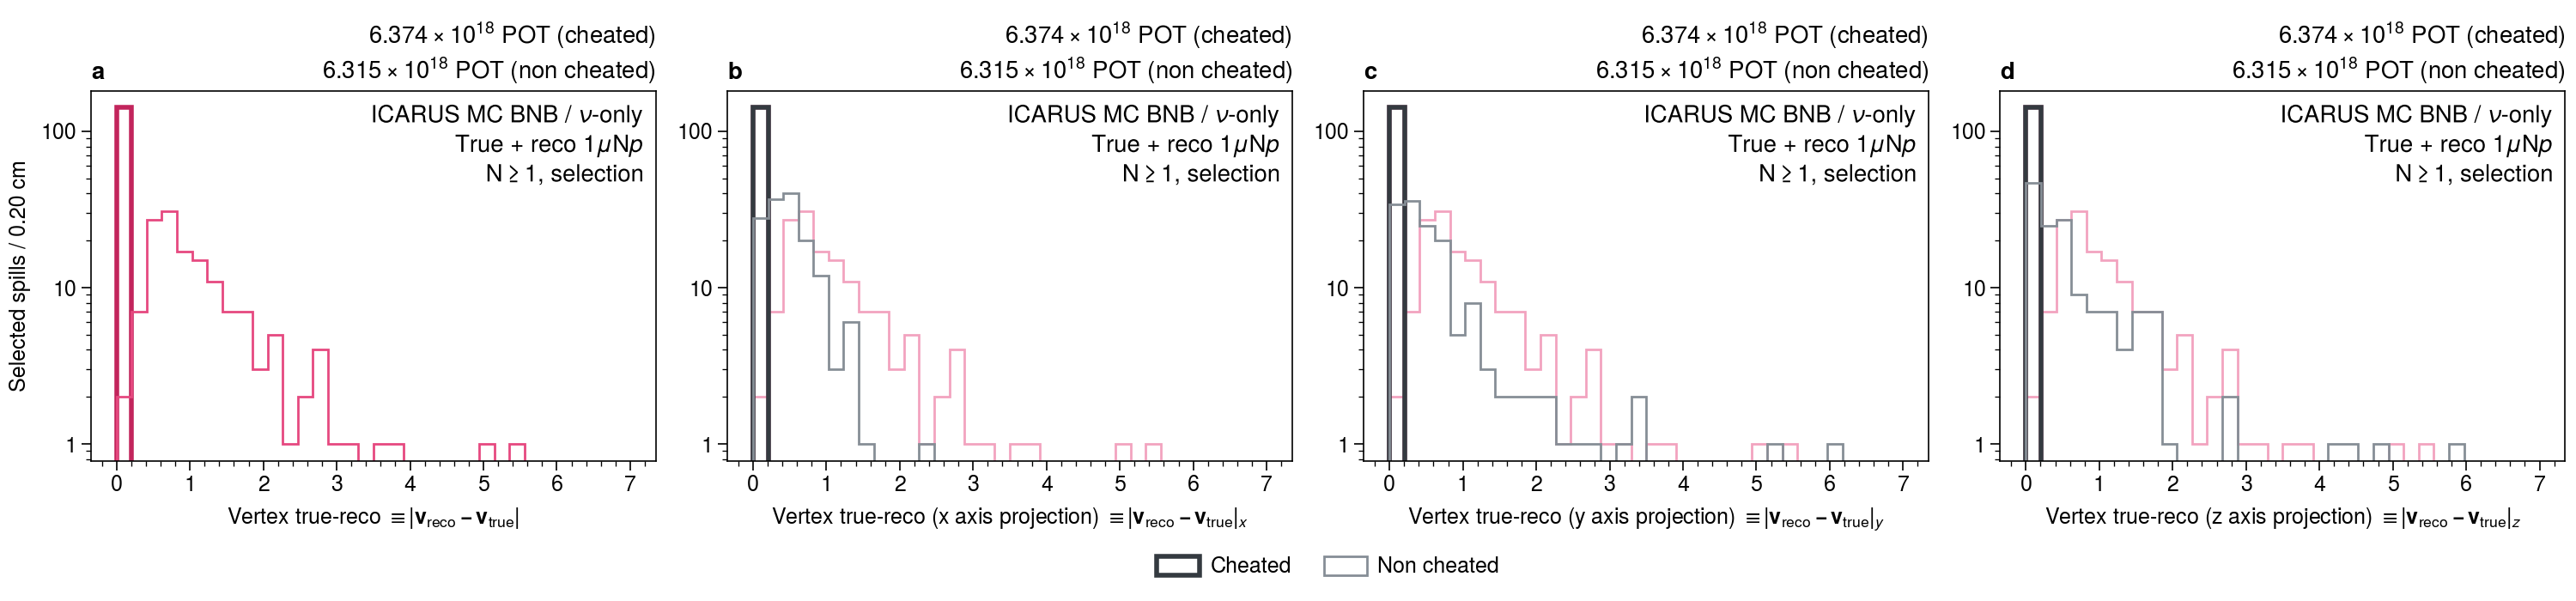

In [336]:
bins = np.linspace(0, 7, 35)

cheating_dict = {
    'color': 'gray8',
    'lw': 2,
    'ls': '-',
    'fill': False,
    'alpha': 1,
}


un_cheating_dict = {
    'color': 'gray6',
    'lw': 1,
    'ls': '-',
    'fill': False,
    'alpha': 1
}

cheating_dict_nocolor = {
    # 'color': 'gray8',
    'lw': 2,
    'ls': '-',
    'fill': False,
    # 'alpha': 0.5,
}


un_cheating_dict_nocolor = {
    # 'color': 'gray6',
    'lw': 1,
    'ls': '-',
    'fill': False,
    # 'alpha': 0.5
}


fig, ax = plot.subplots(
    width=15, height=3.5, ncols=4, nrows=1, 
    xlabel=r'Vertex true-reco $\equiv |{\bf v_\text{reco} - v_\text{true}}|$', ylabel=f'Selected spills / {(bins.max()-bins.min())/len(bins):.2f} cm',  
    titlecolor='k', abc=True, share=False, grid=False, sharey='labs',
    rtitle=f'${cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (cheated)\n${non_cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (non cheated)',
    # titlesize=9,
    urtitle='ICARUS MC BNB / $\\nu$-only\nTrue + reco $1\\mu \\text{N}p$\nN$\\geq1$, selection', yscale='log',
    # suptitle='Vertex differences'
)

ax[0].hist(cheated_checks.vertex_difference.to_numpy(), bins=bins, **cheating_dict_nocolor, color='pink8')
ax[0].hist(non_cheated_checks.vertex_difference.to_numpy(), bins=bins, **un_cheating_dict_nocolor, color='pink6')

for idx, axis in enumerate(['x', 'y', 'z']): 
    ax[idx+1].hist(cheated_checks.vertex_difference.to_numpy(), bins=bins, **cheating_dict_nocolor, color='pink8', alpha=0.5)
    ax[idx+1].hist(non_cheated_checks.vertex_difference.to_numpy(), bins=bins, **un_cheating_dict_nocolor, color='pink6', alpha=0.5)
    if idx == 1:
        ax[idx+1].hist(cheated_checks[f'vertex_difference_{axis}'].to_numpy(), bins=bins, **cheating_dict, label='Cheated')
        ax[idx+1].hist(non_cheated_checks[f'vertex_difference_{axis}'].to_numpy(), bins=bins, **un_cheating_dict, label='Non cheated')
    else:
        ax[idx+1].hist(cheated_checks[f'vertex_difference_{axis}'].to_numpy(), bins=bins, **cheating_dict)
        ax[idx+1].hist(non_cheated_checks[f'vertex_difference_{axis}'].to_numpy(), bins=bins, **un_cheating_dict)
    ax[idx+1].format(xlabel=f'Vertex true-reco ({axis} axis projection) $\\equiv |{{\\bf v_\\text{{reco}} - v_\\text{{true}}}}|_{axis}$')

fig.legend(loc='b')
fig.savefig('vertex.pdf')

## Hit purity/completeness

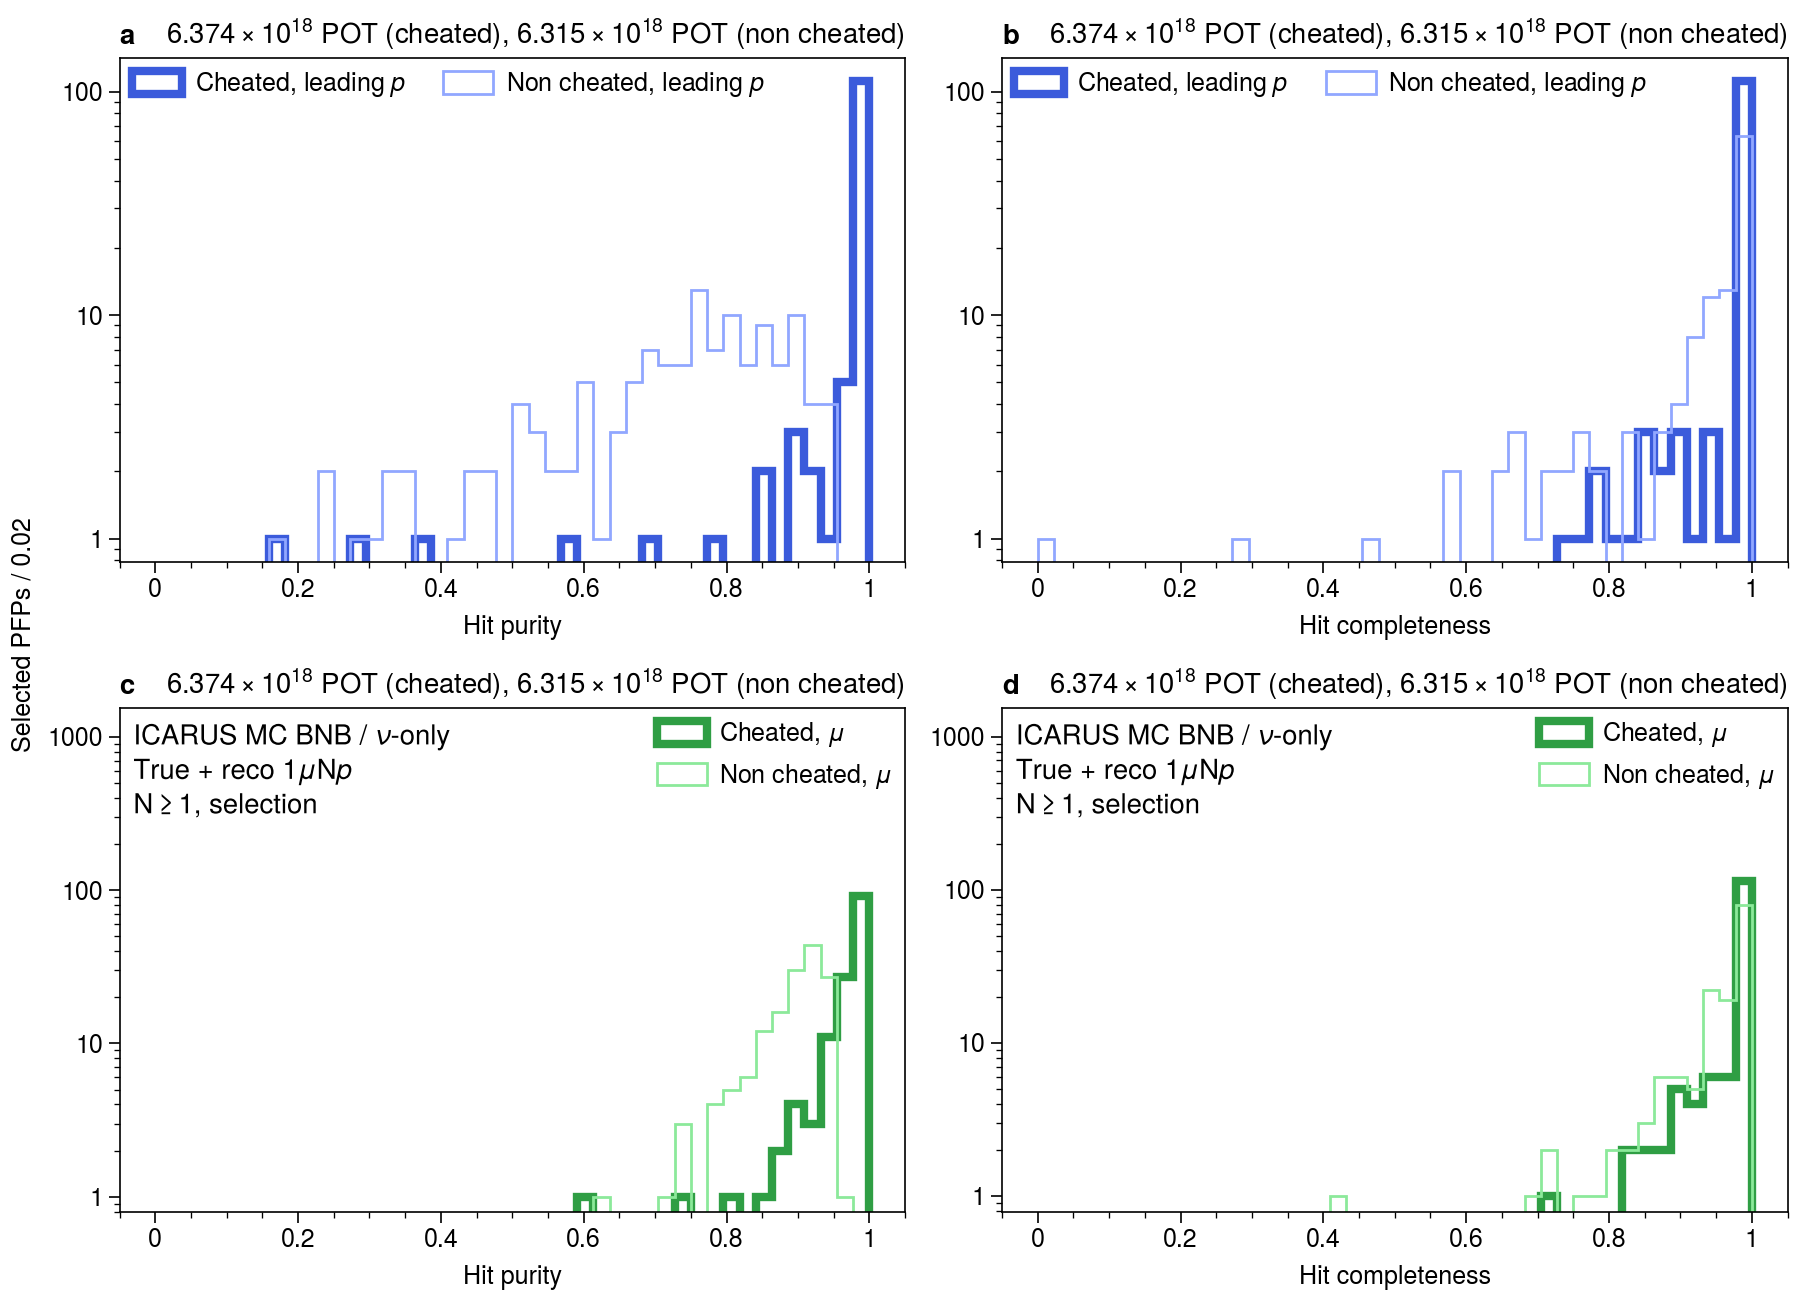

In [337]:
bins=np.linspace(0, 1, 45)

fig, ax = plot.subplots(
    width=9, height=6.5, ncols=2, nrows=2, 
    xlabel=r'Hits', ylabel=f'Selected PFPs / {(bins.max()-bins.min())/len(bins):.2f}',  
    titlecolor='k', abc=True, share=False, grid=False, sharey='labs',
    rtitle=f'${cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (cheated), ${non_cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (non cheated)',
    # titlesize=9,
    ultitle='ICARUS MC BNB / $\\nu$-only\nTrue + reco $1\\mu \\text{N}p$\nN$\\geq1$, selection', yscale='log',
)

cheating_dict = {
    'lw': 3,
    'fill': False,
}

un_cheating_dict = {
    'lw': 1,
    'fill': False,
}

cheating_color = {
    'proton': 'indigo8',
    'muon': 'green8'
}

un_cheating_color = {
    'proton': 'indigo3',
    'muon': 'green3'
}

particle_name = {
    'proton': 'leading $p$',
    'muon': '$\\mu$'
}

for idx_p, particle in enumerate(['proton', 'muon']):
    for idx_l, label in enumerate(['purity', 'completeness']):
        ax[idx_p, idx_l].hist(cheated_checks[f'{particle}_{label}'].to_numpy(), bins=bins, **cheating_dict, 
                              color=cheating_color[particle], label=f'Cheated, {particle_name[particle]}')
        ax[idx_p, idx_l].hist(non_cheated_checks[f'{particle}_{label}'].to_numpy(), bins=bins, **un_cheating_dict, 
                              color=un_cheating_color[particle], label=f'Non cheated, {particle_name[particle]}')
        ax[idx_p, idx_l].format(xlabel=f'Hit {label}')

for idx_l, label in enumerate(['purity', 'completeness']):
    ax[idx_l].format(ultitle='')
    ax[idx_l].legend(loc='ul', ncols=2, order='F')

ax[2].legend(loc='ur', ncols=1)
ax[3].legend(loc='ur', ncols=1)

ax[2].format(ymax=1550)
ax[3].format(ymax=1550)

fig.savefig('hit_purity_completeness.pdf')

## Length reco/true

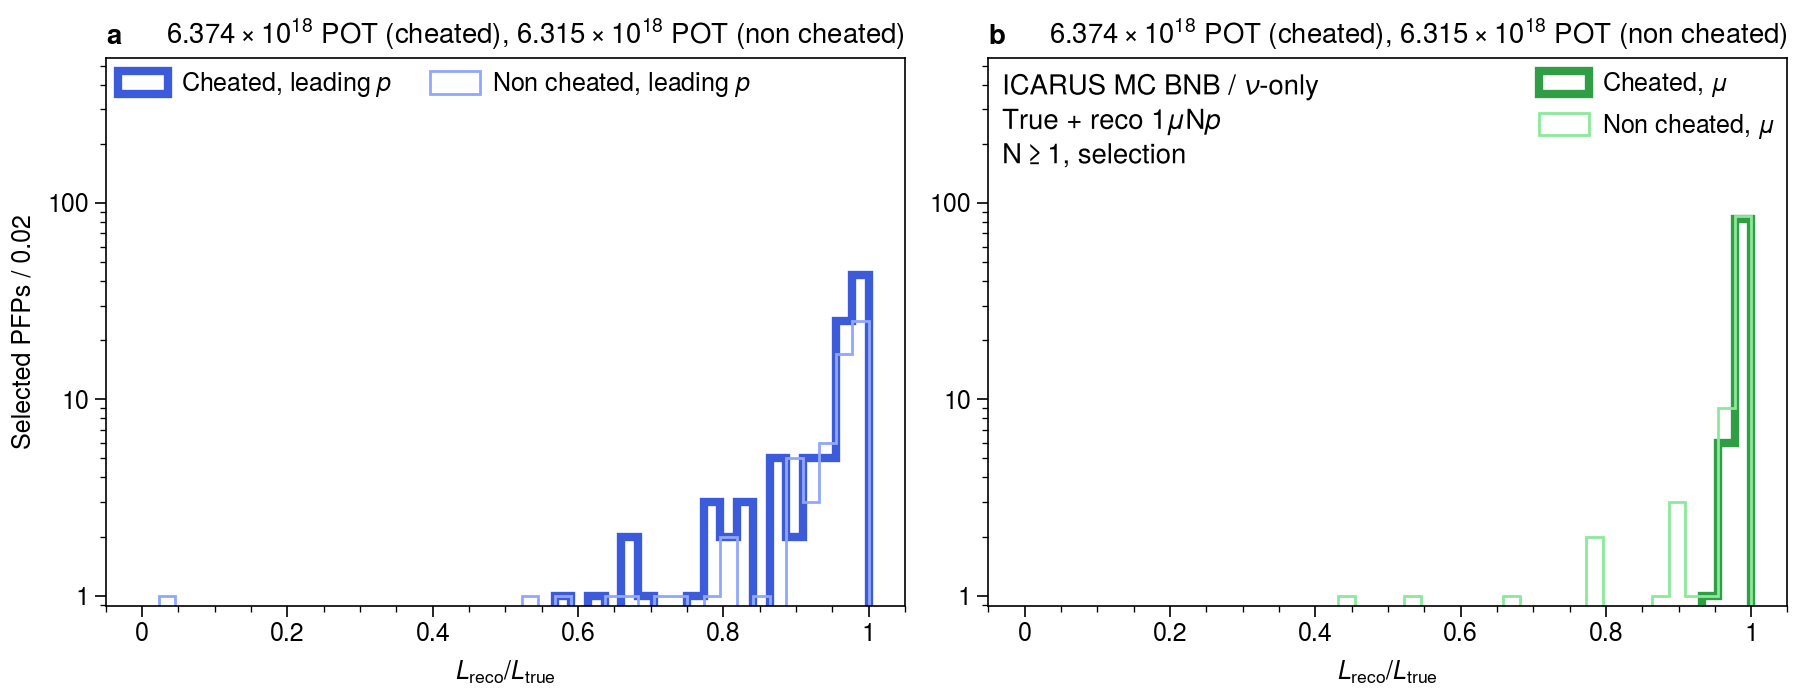

In [338]:
bins=np.linspace(0, 1, 45)

cheating_color = {
    'leading_proton': 'indigo8',
    'muon': 'green8'
}

un_cheating_color = {
    'leading_proton': 'indigo3',
    'muon': 'green3'
}

particle_name = {
    'leading_proton': 'leading $p$',
    'muon': '$\\mu$'
}

fig, ax = plot.subplots(
    width=9, height=3.5, ncols=2, nrows=1, 
    xlabel=r'$L_\text{reco}/L_\text{true}$', ylabel=f'Selected PFPs / {(bins.max()-bins.min())/len(bins):.2f}',  
    titlecolor='k', abc=True, share=False, grid=False, sharey='labs',
    rtitle=f'${cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (cheated), ${non_cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (non cheated)',
    # titlesize=9,
    ultitle='ICARUS MC BNB / $\\nu$-only\nTrue + reco $1\\mu \\text{N}p$\nN$\\geq1$, selection', yscale='log', ymax=550
)

for idx_p, particle in enumerate(['leading_proton', 'muon']):
    ax[idx_p].hist(cheated_checks[f'{particle}_L_reco_true_ratio'].to_numpy(), bins=bins, **cheating_dict, 
                   color=cheating_color[particle], label=f'Cheated, {particle_name[particle]}')
    ax[idx_p].hist(non_cheated_checks[f'{particle}_L_reco_true_ratio'].to_numpy(), bins=bins, **un_cheating_dict, 
                   color=un_cheating_color[particle], label=f'Non cheated, {particle_name[particle]}')

# ax[0].hist(nopid_cheated_multip[f'protons_L_reco_true_ratio'].to_numpy(), bins=bins, 
#            color=cheating_color['leading_proton'], alpha=0.25, label=f'Cheated, all $p$', zorder=1)
# ax[0].hist(nopid_non_cheated_multip[f'protons_L_reco_true_ratio'].to_numpy(), bins=bins, 
#            color=un_cheating_color['leading_proton'], fill=False, hatch='/////', alpha=0.5, label=f'Non cheated, all $p$', zorder=1)
ax[0].format(ultitle='')
ax[0].legend(loc='ul', ncols=2, order='F')
ax[1].legend(loc='ur', ncols=1)

fig.savefig('L_reco_true_ratio.pdf')

## Momentum reco/true

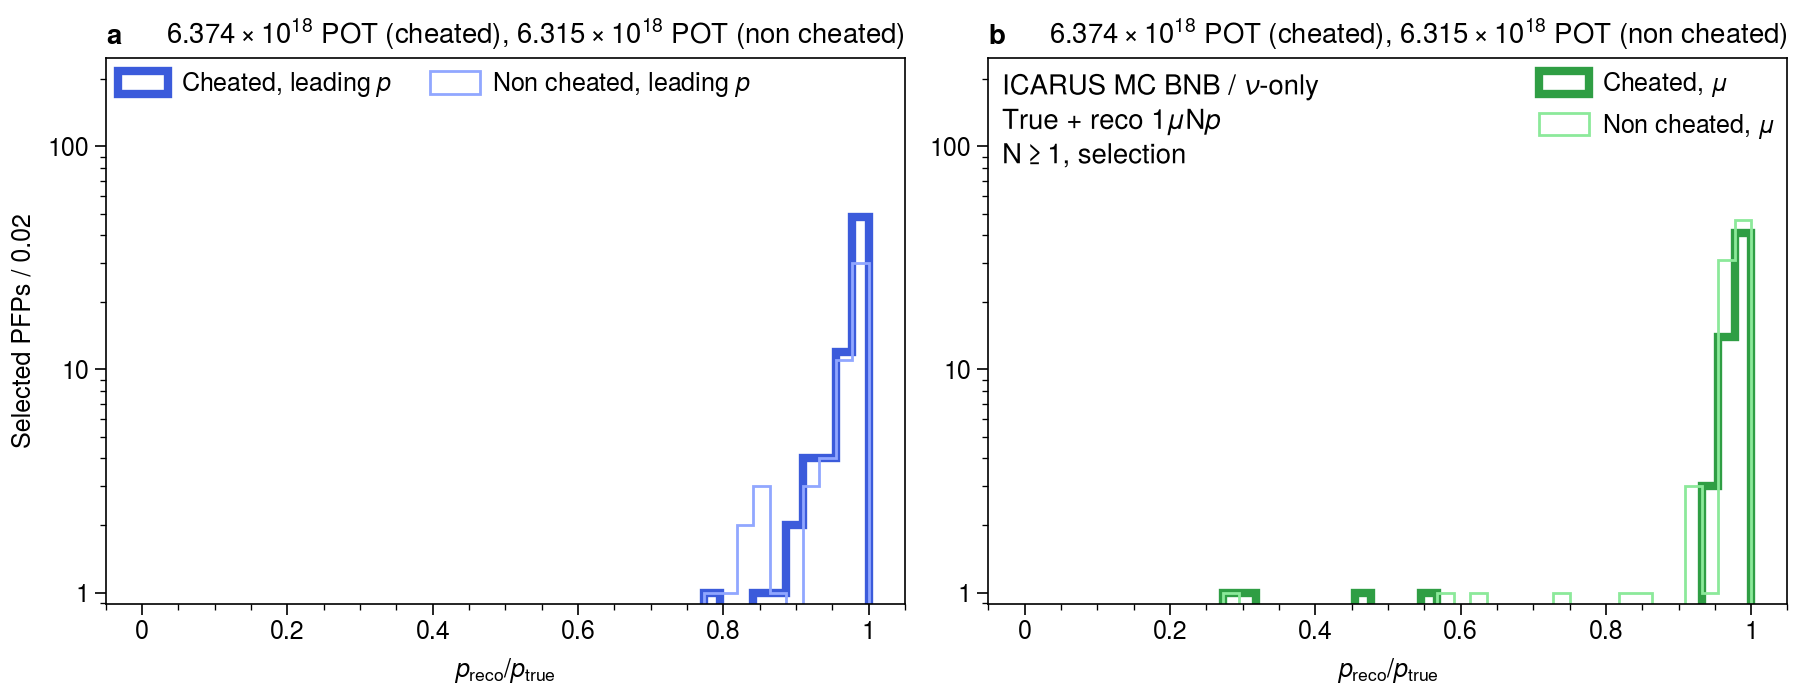

In [339]:
bins=np.linspace(0, 1, 45)

fig, ax = plot.subplots(
    width=9, height=3.5, ncols=2, nrows=1, 
    xlabel=r'$p_\text{reco}/p_\text{true}$', ylabel=f'Selected PFPs / {(bins.max()-bins.min())/len(bins):.2f}',  
    titlecolor='k', abc=True, share=False, grid=False, sharey='labs',
    rtitle=f'${cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (cheated), ${non_cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (non cheated)',
    # titlesize=9,
    ultitle='ICARUS MC BNB / $\\nu$-only\nTrue + reco $1\\mu \\text{N}p$\nN$\\geq1$, selection', yscale='log', ymax=250
)

for idx_p, particle in enumerate(['leading_proton', 'muon']):
    ax[idx_p].hist(cheated_checks[f'{particle}_P_reco_true_ratio'].to_numpy(), bins=bins, **cheating_dict, 
                   color=cheating_color[particle], label=f'Cheated, {particle_name[particle]}')
    ax[idx_p].hist(non_cheated_checks[f'{particle}_P_reco_true_ratio'].to_numpy(), bins=bins, **un_cheating_dict, 
                   color=un_cheating_color[particle], label=f'Non cheated, {particle_name[particle]}')

ax[0].format(ultitle='')
ax[0].legend(loc='ul', ncols=2, order='F')
ax[1].legend(loc='ur', ncols=1)

fig.savefig('P_reco_true_ratio.pdf')

## Energia ricostruita

Plot dell'enrgia ricostruita e della sua differenza rispetto al true $\delta_E = E_\text{reco}-E_\text{true}/E_\text{true}$

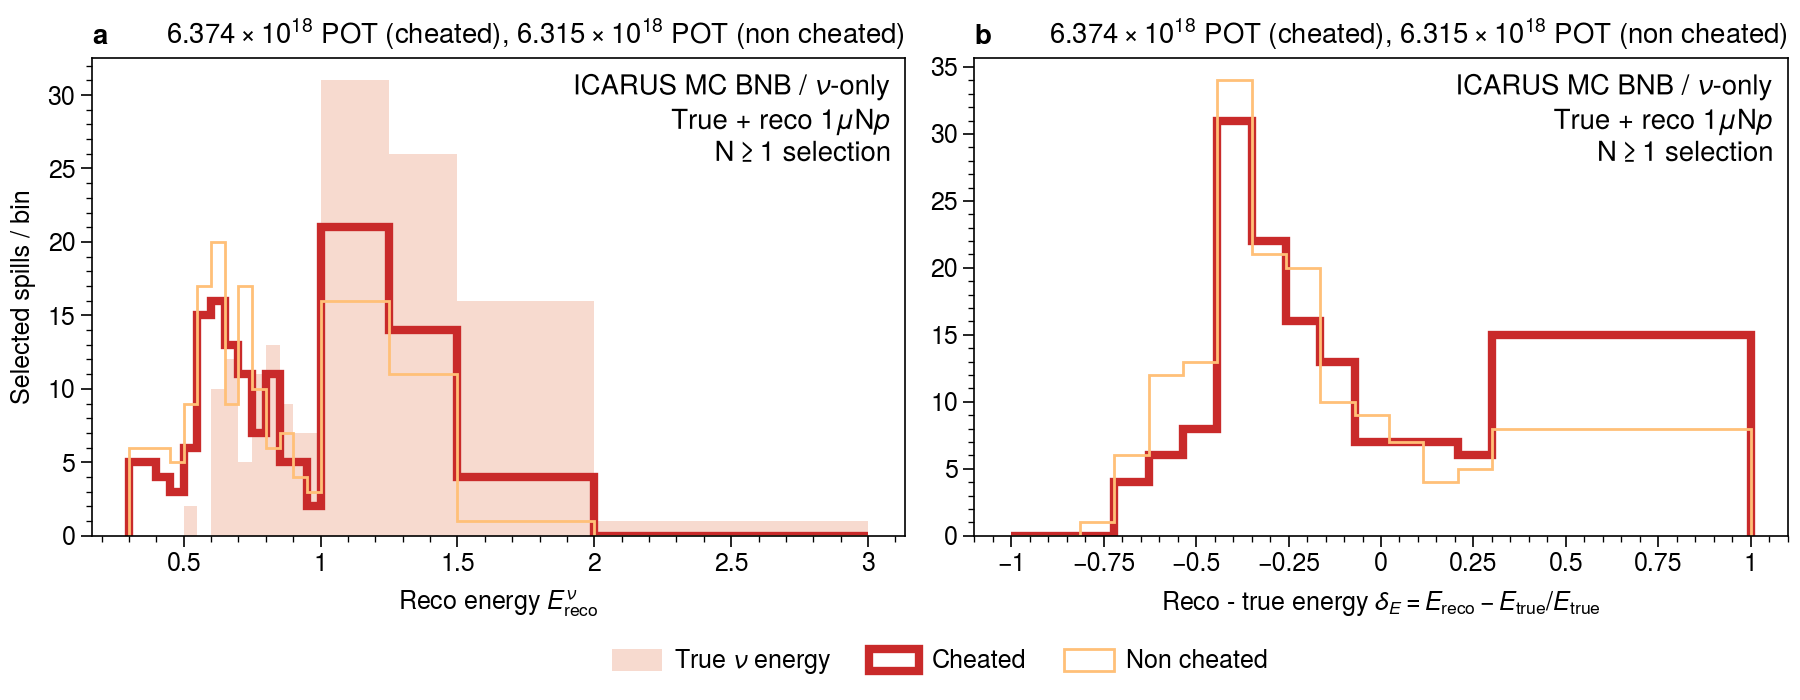

In [340]:
bins=np.array([0.3, 0.4, 0.45, 0.5,0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.25, 1.5, 2.0, 3.0])

# # Define binning parameters
# linthresh = 0.1  # Linear threshold where transition occurs
# num_linear_bins = 5  # Number of bins in the linear region
# num_log_bins = 5  # Number of bins per logarithmic side

# # Logarithmic bins for positive and negative sides
# log_bins_pos = np.geomspace(linthresh, 1, num_log_bins)
# log_bins_neg = -log_bins_pos[::-1]  # Mirror for negative side

# # Linear bins in the middle
# lin_bins = np.linspace(-linthresh, linthresh, num_linear_bins)

# # Combine bins while avoiding duplicates
# dE_bins=np.concatenate([log_bins_neg, lin_bins[1:-1], log_bins_pos]) 

cheated = file['cheated/cheated'].arrays(library='ak')
non_cheated = file['non_cheated/non_cheated'].arrays(library='ak')

dE_bins=np.linspace(-1, 0.3, 15)
dE_bins=np.concatenate([dE_bins, np.array([1.])])

fig, ax = plot.subplots(
    width=9, height=3.5, ncols=2, nrows=1, 
    xlabel=r'Reco energy $E_\text{reco}^\nu$', ylabel=f'Selected spills / bin',  
    titlecolor='k', abc=True, share=False, grid=False, sharey='labs',
    rtitle=f'${cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (cheated), ${non_cheated_POT[0]/1e18:.3f}\\times 10^{{18}}$ POT (non cheated)',
    # titlesize=9,
    urtitle='ICARUS MC BNB / $\\nu$-only\nTrue + reco $1\\mu \\text{N}p$\nN$\\geq1$ selection'# , yscale='log',
)

cheating_dict = {
    'lw': 3,
    'fill': False,
}

un_cheating_dict = {
    'lw': 1,
    'fill': False,
}

cheating_dict['color'] = 'red9'
un_cheating_dict['color'] = 'orange3'

ax[0].hist(cheated.reco_E.to_numpy(), bins=bins, **cheating_dict)
ax[0].hist(non_cheated.reco_E.to_numpy(), bins=bins, **un_cheating_dict)

ax[0].hist(non_cheated.true_E.to_numpy(), bins=bins, color='orange9', alpha=0.2, fill=True, label='True $\\nu$ energy')

ax[1].hist(cheated.delta_E.to_numpy(), bins=dE_bins, **cheating_dict, label='Cheated')
ax[1].hist(non_cheated.delta_E.to_numpy(), bins=dE_bins, **un_cheating_dict, label='Non cheated')
ax[1].format(xlabel=r'Reco - true energy $\delta_E = E_\text{reco}-E_\text{true}/E_\text{true}$')

fig.legend(loc='b')
fig.savefig('energy.pdf')

In [341]:
(non_cheated.delta_E > -2).to_numpy().sum(), (cheated.delta_E > -2).to_numpy().sum()

(np.int64(150), np.int64(142))